In [1]:
import matplotlib.pyplot as plt

## S03 T01: Visualització gràfica d'un dataset

### Descripció
Complementa les tècniques d'exploració de les dades mitjantçant la visualització gràfica, amb les llibreries Matplotlib i Searborn.

#### Exercici 1
Resumeix gràficament el data set DelayedFlights.csv

Crea almenys una visualització per:

Una variable categòrica (UniqueCarrier)
Una variable numèrica (ArrDelay)
Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
Dues variables numèriques (ArrDelay i DepDelay)
Tres variables (ArrDelay, DepDelay i UniqueCarrier)
Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 

df = pd.read_csv('DelayedFlights.csv')
dff = df["UniqueCarrier"].to_numpy()

#### Una variable categòrica (UniqueCarrier)

D:\users\ciberintegra_09\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


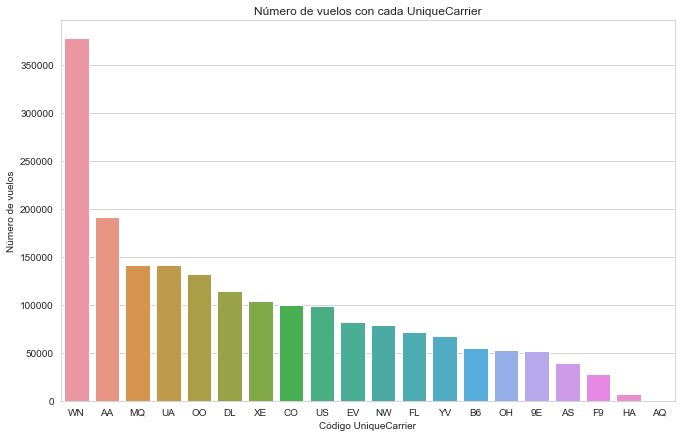

In [3]:
x = "UniqueCarrier"
plt.figure(figsize=(11,7))
sns.set_style("whitegrid")
plot = sns.countplot(x, data=df, order = df.UniqueCarrier.value_counts().index)
plt.title("Número de vuelos con cada UniqueCarrier")
plt.xlabel("Código UniqueCarrier")
plt.ylabel("Número de vuelos")
plt.savefig("Una variable categòrica.png")
plt.show()


#### Una variable numèrica (ArrDelay)

In [4]:
import math
def truncate(number, digits) -> float:
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper

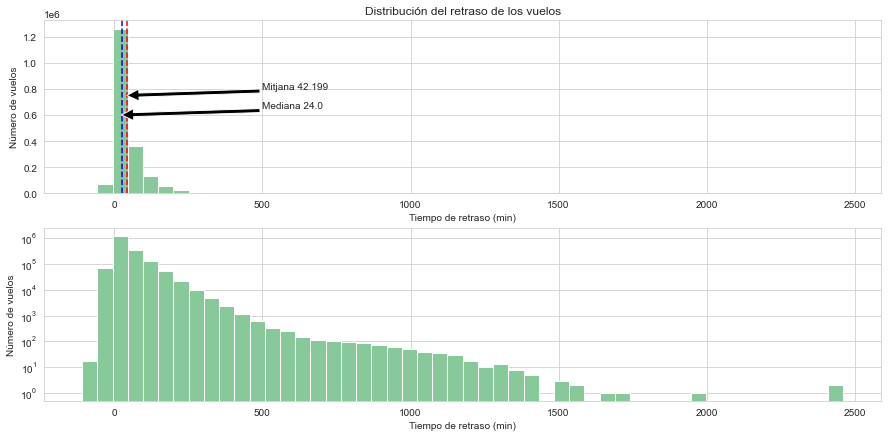

In [5]:
mask = df["ArrDelay"] <= 400
dff = df["ArrDelay"]
num_bins = 50
plt.figure(figsize=(15,7))
v1 = "Mitjana " + str(truncate(df.ArrDelay.mean(), 3))
v2 = "Mediana " + str(truncate(df.ArrDelay.median(), 3))
plt.subplot(2,1,1)
plt.axvline(df.ArrDelay.mean(), color ="Red", linestyle="--")
plt.axvline(df.ArrDelay.median(), color ="Blue", linestyle="--")
plt.annotate(v1, xy=(df.ArrDelay.mean(),750000),xytext=(500,800000), arrowprops=dict(facecolor='black'))
plt.annotate(v2, xy=(df.ArrDelay.median(),600000),xytext=(500,650000), arrowprops=dict(facecolor='black'))
plt.title("Distribución del retraso de los vuelos")
plt.xlabel("Tiempo de retraso (min)")
plt.ylabel("Número de vuelos")
plt.hist(dff, num_bins, color = "#88c999")
plt.subplot(2,1,2)
plt.xlabel("Tiempo de retraso (min)")
plt.ylabel("Número de vuelos")
plt.yscale("log")
plt.hist(dff, num_bins, color = "#88c999")
plt.savefig("Una variable numèrica1.png")
plt.show()


Les dos gràfiques mostren el mateix però l'eix de les y de la segona escala logaritmicament de manera que podem visualitzar millor les dades que en un primer moment no es poden veure a la primera gràfica, també podem veure millor els màxims i mínims en la seguent gràfica que en el primer gràfic de barres no es veuen.

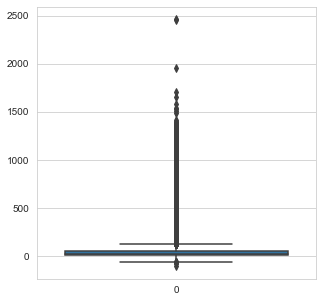

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(5, 5))
sns.boxplot(data = df["ArrDelay"])
plt.savefig("Una variable numèrica2.png")
plt.show()


#### Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)

UniqueCarrier         9E         AA         AQ         AS         B6  \
ArrDelay       46.936493  46.561553  21.255376  36.060882  55.088739   

UniqueCarrier         CO         DL         EV         F9         FL  \
ArrDelay       40.568449  39.881507  47.554255  27.938953  43.683157   

UniqueCarrier         HA         MQ      NW         OH         OO         UA  \
ArrDelay       34.209449  45.295058  43.911  51.016968  45.370587  47.784399   

UniqueCarrier         US         WN         XE         YV  
ArrDelay       36.445019  30.087884  50.181217  55.287049  


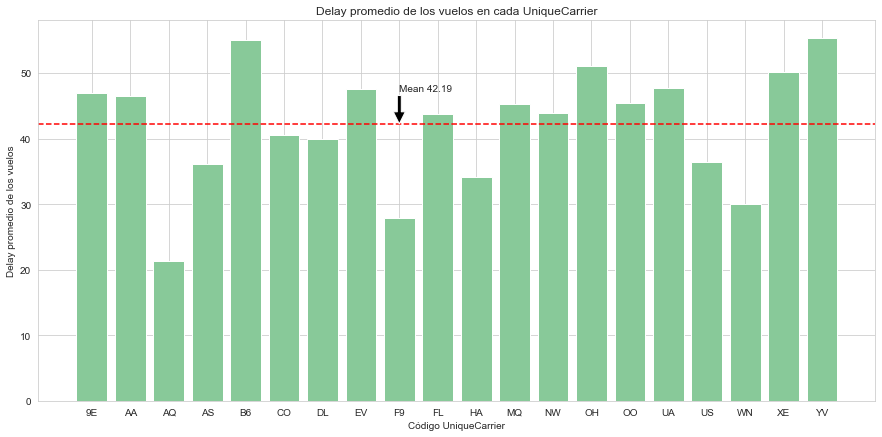

In [7]:
dat = df[["UniqueCarrier", "ArrDelay"]]
dat = dat.groupby("UniqueCarrier").mean()
dat = dat.T
print(dat)
plt.figure(figsize=(15,7))
plt.bar(dat.columns, dat.loc["ArrDelay"], color = "#88c999")
plt.axhline(df.ArrDelay.mean(), color ="Red", linestyle="--")
nu = "Mean "+ str(truncate(df.ArrDelay.mean(), 2))
plt.title("Delay promedio de los vuelos en cada UniqueCarrier")
plt.xlabel("Código UniqueCarrier")
plt.ylabel("Delay promedio de los vuelos")
plt.annotate(nu, xy=(dat.columns.get_loc("F9"),dat.loc["ArrDelay"].mean()),xytext=(dat.columns.get_loc("F9"),dat.loc["ArrDelay"].mean()+5),arrowprops=dict(facecolor='black'))
plt.savefig("Una variable numèrica y una categòrica.png")
plt.show()


#### Dues variables numèriques (ArrDelay i DepDelay)

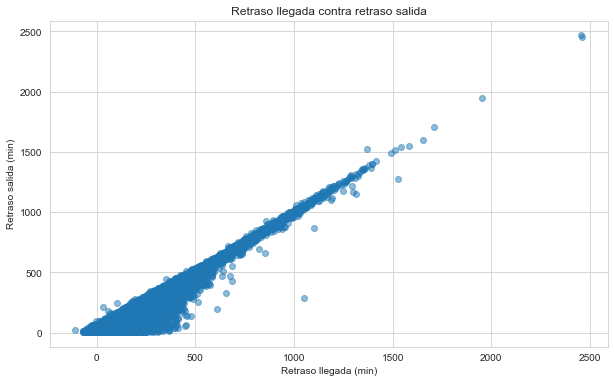

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(df["ArrDelay"], df["DepDelay"], alpha = 0.5)
plt.title("Retraso llegada contra retraso salida")
plt.xlabel("Retraso llegada (min)")
plt.ylabel("Retraso salida (min)")
plt.savefig("Dues variables numèriques.png")
plt.show()


Se observa que la relacion entre el retraso de la salida y llegada es pràcticamente lineal, a medida que el retraso en la salida es menor el retraso en la llegada suele ser de mas tiempo que en la salida 

#### Tres variables (ArrDelay, DepDelay i UniqueCarrier)

Igual que en la gràfica anterior pero separando los resultados para cada UniqueCarrier utilizando diferentes colores

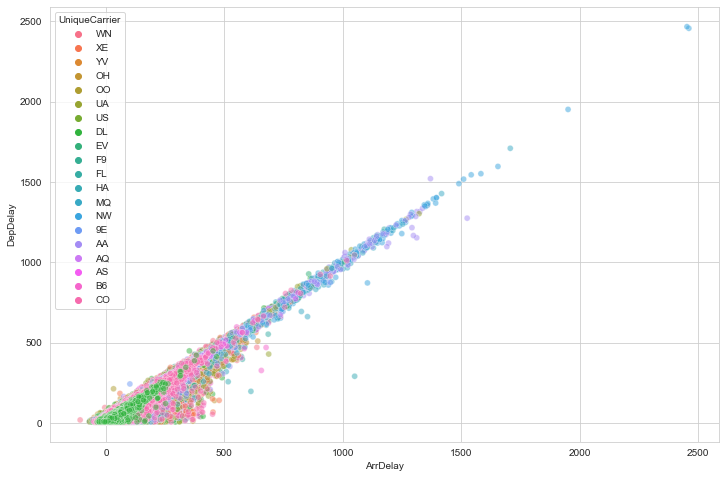

In [9]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = df, x = "ArrDelay", y = "DepDelay", hue = "UniqueCarrier", alpha = 0.5)
plt.savefig("Tres variables.png")
plt.show()


#### Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

En este caso utilizamos otra vez la gráfica de las dos variables numéricas pero en este a parte de añadirle colores por cada UniqueCarrier los resultados tendran un tamaño diferente dependiendo de el tiempo en el aire

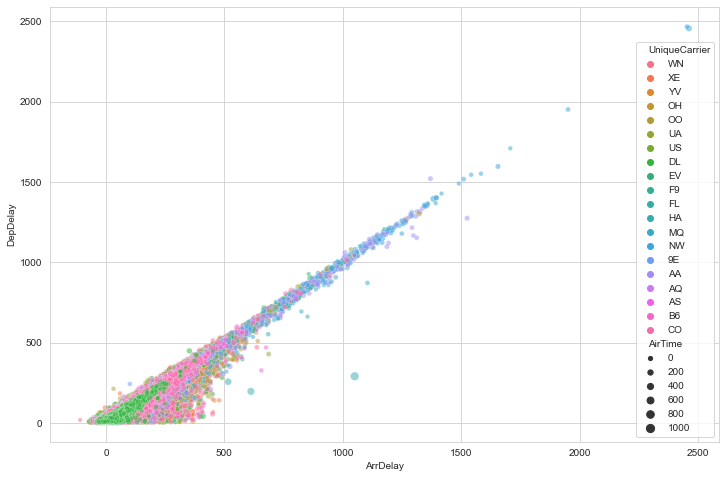

In [10]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = df, x = "ArrDelay", y = "DepDelay", hue = "UniqueCarrier", size = "AirTime", alpha = 0.5)
plt.savefig("Més de tres variables.png")
plt.show()
